<a href="https://colab.research.google.com/github/kitewatermelon/MAI-Lab/blob/main/icars_cerebellum_volume_%EC%95%84%EC%9B%83%EB%9D%BC%EC%9D%B4%EC%96%B4_%EC%9C%84%EC%95%84%EB%9E%98_%EB%8F%99%EC%8B%9C_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
file = '/content/drive/MyDrive/Lab/cerebellar_atrophy_data.csv'

In [126]:
data = pd.read_csv('/content/drive/MyDrive/Lab/cerebellar_atrophy_data.csv',encoding='CP949')

성별이 object 형이라 정수로 만들어 줌

In [127]:
data['sex'] = data['sex'].str.replace("'", "").astype(int)

필요 없는 name drop

In [128]:
data = data.drop('name', axis=1)

데이터 분포 확인

In [129]:
#회귀 선
original_line = []

#회귀 선 기울기
original_coef = []

def makeModel(df):

  df = pd.DataFrame(df)

  # 선형 회귀 모델 생성
  model = LinearRegression()

  # 모델 학습
  model.fit(df[['icars']], df['cerebellum_volume'])

  # 선형 회귀식의 계수와 절편 출력
  slope = model.coef_
  intercept = model.intercept_

  # 임계값 설정하여 데이터 분할
  threshold = slope * df['icars'] + intercept
  df_above = df[df['cerebellum_volume'] > threshold]
  df_below = df[df['cerebellum_volume'] < threshold]

  #회귀선 저장
  original_line.append(model.predict(df[['icars']]))

  #기울기 저장
  original_coef.append(model.coef_)

  return threshold

#모델 초기화
def initModel(df, original_line):
  for i in range(len(original_line)):
    df['pred'] = original_line
    df['difference'] = df['cerebellum_volume'] - df['pred']


In [130]:
# threshold = makeModel(data)

In [131]:
# def drawModel(df, original_line):
#   # 그래프 그리기
#   plt.figure(figsize=(10, 6))

#   # 예측된 값이 임계값 이상인 경우 파랑색으로 표시
#   plt.scatter(df['icars'], df['cerebellum_volume'], color='black', label='df')

#   # 선형 회귀 예측 결과 그리기 (초록색)
#   plt.plot(df['icars'], original_line , linestyle='-', color='blue')

#   # 그래프에 축 레이블 추가
#   plt.xlabel('icars')
#   plt.ylabel('cerebellum_volume')

#   # 범례 추가
#   plt.legend()

#   # 그래프 보여주기
#   plt.show()

In [132]:
# for i in range(len(original_line)):
#   drawModel(data, original_line[i])

In [133]:
def seperateData(data, threshold):
  sa = data[data['cerebellum_volume'] > threshold]
  ba = data[data['cerebellum_volume'] < threshold]

  sa_icars_mean = np.mean(sa['icars'])
  ba_icars_mean = np.mean(ba['icars'])

  return sa, ba, sa_icars_mean, ba_icars_mean

In [134]:
def makeOutlier(sa, ba, sa_icars_mean, ba_icars_mean, df):
  above_outlier = df.iloc[sa[sa['icars'] > sa_icars_mean]['difference'].idxmax()]
  below_outlier = df.iloc[ba[ba['icars'] < ba_icars_mean]['difference'].idxmin()]
  return above_outlier, below_outlier

In [135]:
# above_outlier, below_outlier = makeOutlier(sa, ba, data)
# print(above_outlier, '\n', below_outlier)

In [136]:
def drawOutlierModel(above_outlier, below_outlier, original_line, df):
  plt.figure(figsize=(10, 6))

  # 예측된 값이 임계값 이상인 경우 파랑색으로 표시
  plt.scatter(df['icars'], df['cerebellum_volume'], color='black', label='all df')
  plt.scatter(sa[sa['icars'] > sa_icars_mean]['icars'], sa[sa['icars'] > sa_icars_mean]['cerebellum_volume'], color='orange', label='risk group')
  plt.scatter(ba[ba['icars'] < ba_icars_mean]['icars'], ba[ba['icars'] < ba_icars_mean]['cerebellum_volume'], color='orange', label='risk group')

  plt.scatter(above_outlier['icars'], above_outlier['cerebellum_volume'], color='red', label='outlier')
  plt.scatter(below_outlier['icars'], below_outlier['cerebellum_volume'], color='red', label='outlier')

  plt.plot(df['icars'], original_line , linestyle='-', color='blue')

  # 그래프에 축 레이블 추가
  plt.xlabel('icars')
  plt.ylabel('cerebellum_volume')

  # 범례 추가
  plt.legend()

  # 그래프 보여주기
  plt.show()

In [137]:
# for i in range(len(original_line)):
#   drawOutlierModel(original_line[i], data)

In [138]:
def deleteOutlier(df,above_outlier,below_outlier):
  df = df.drop(df[df['cerebellum_volume'] == above_outlier['cerebellum_volume']].index)
  df = df.drop(df[df['cerebellum_volume'] == below_outlier['cerebellum_volume']].index)
  df = df.reset_index(drop=True)
  return df

In [139]:
df = data

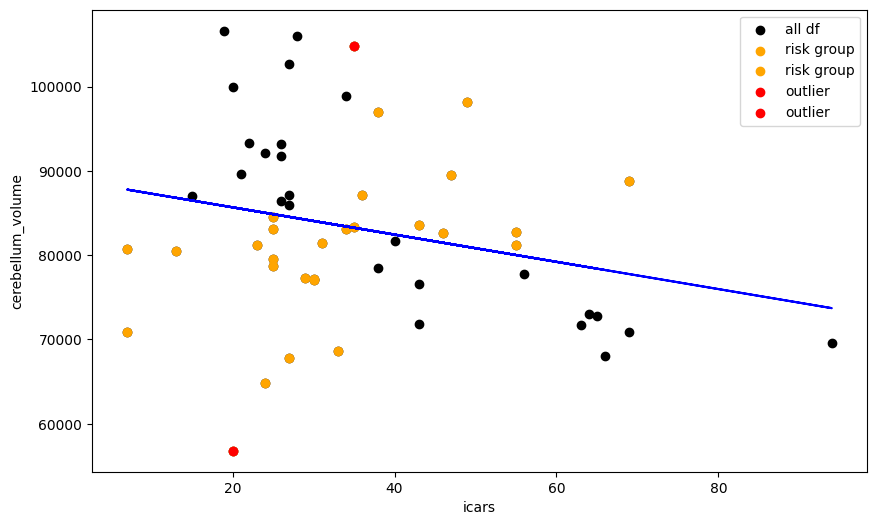

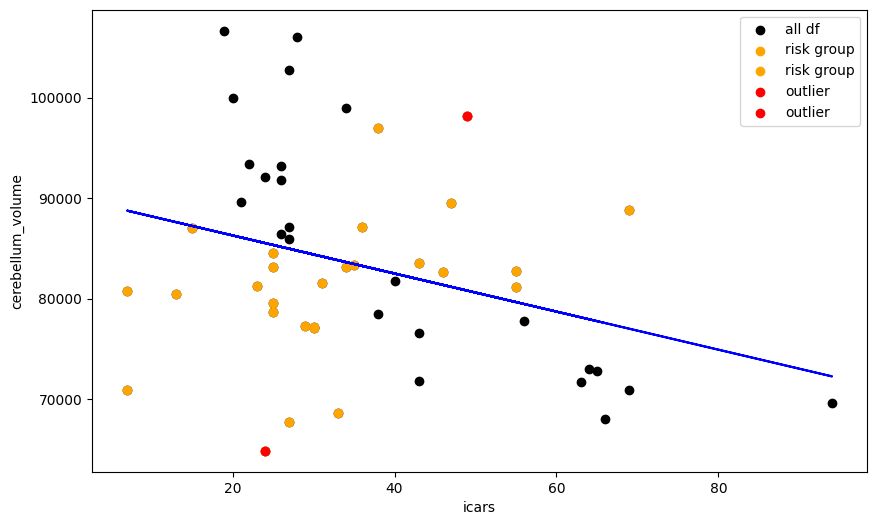

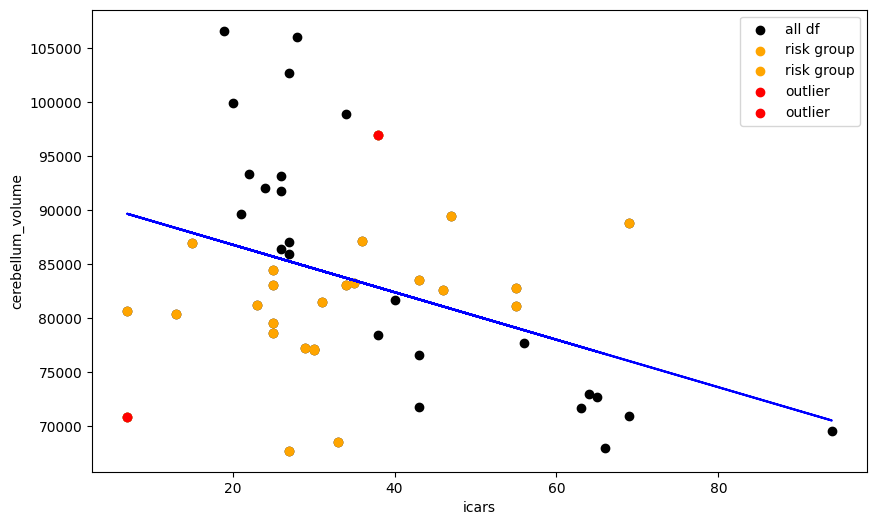

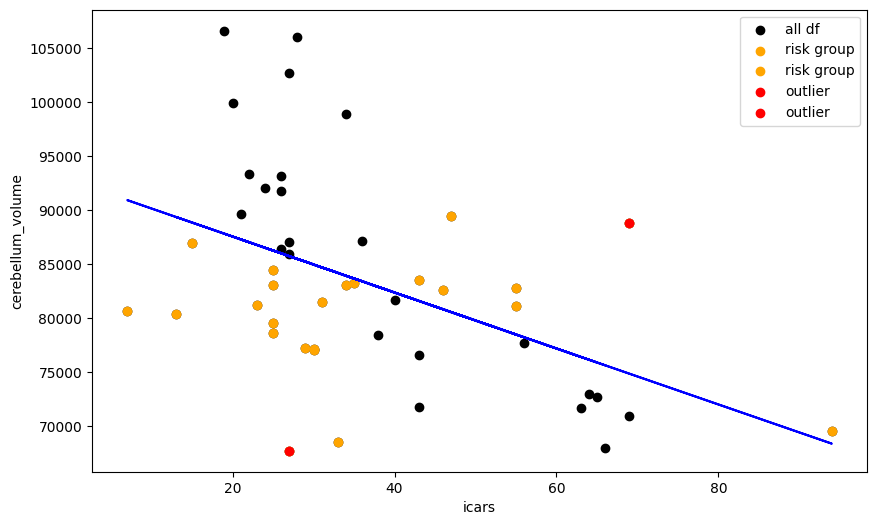

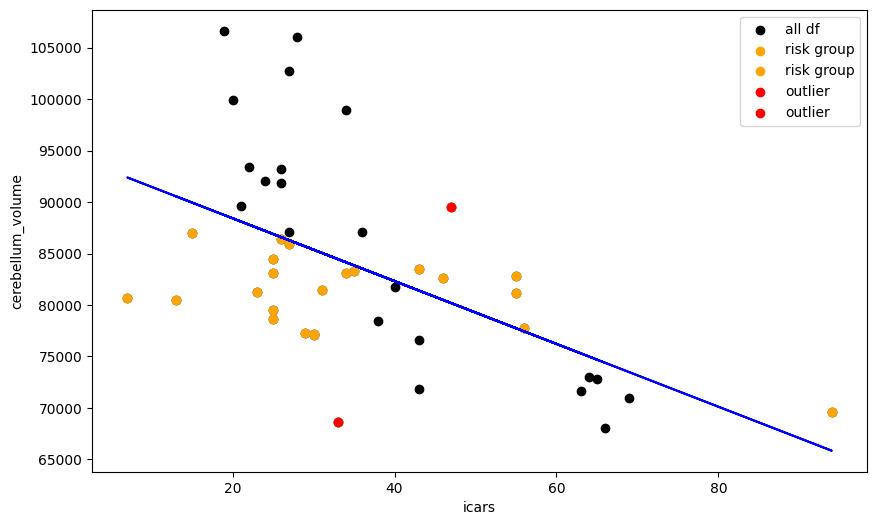

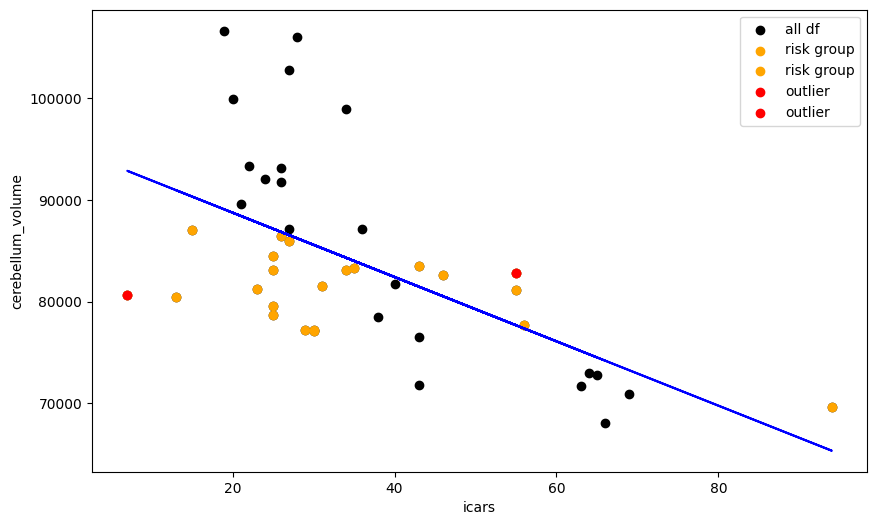

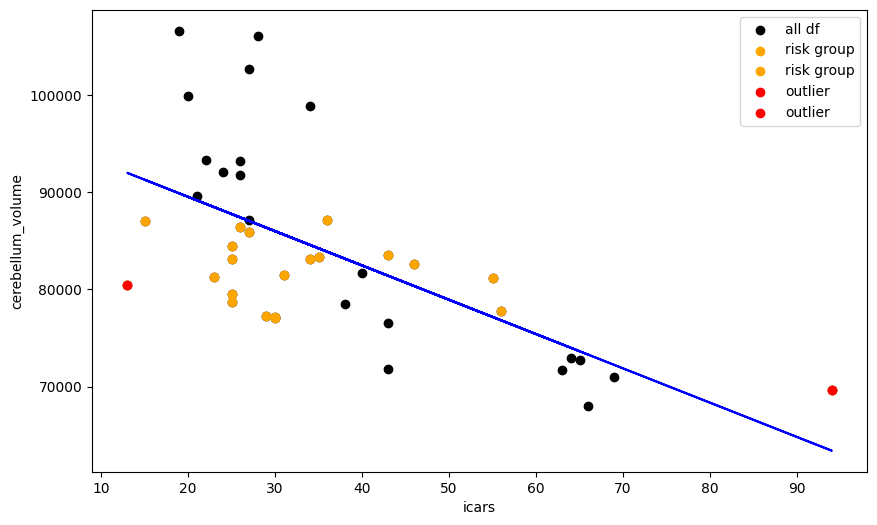

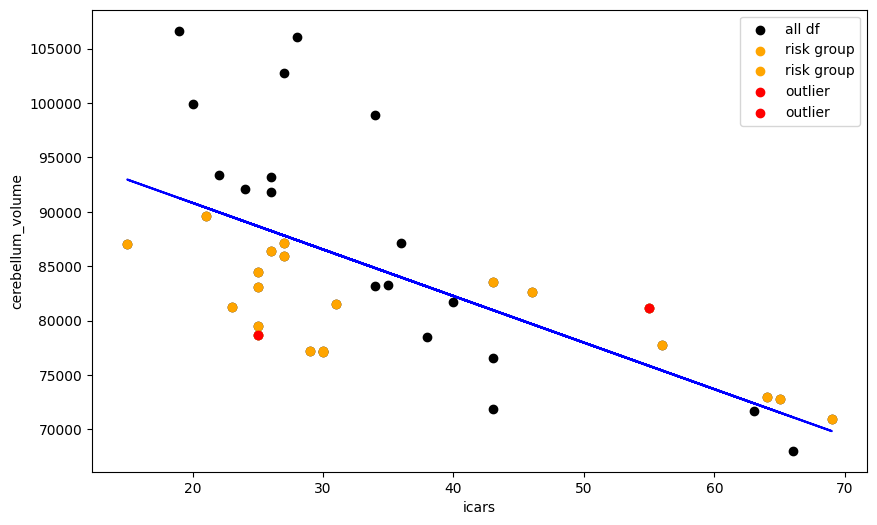

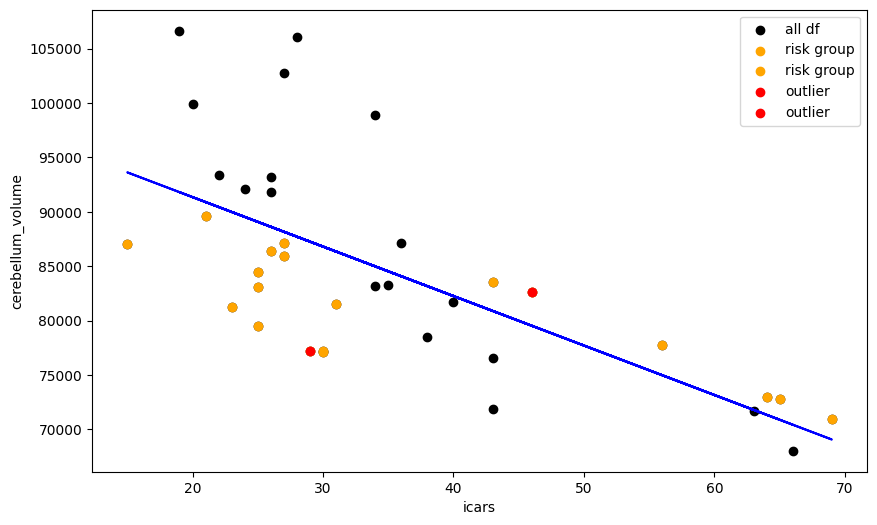

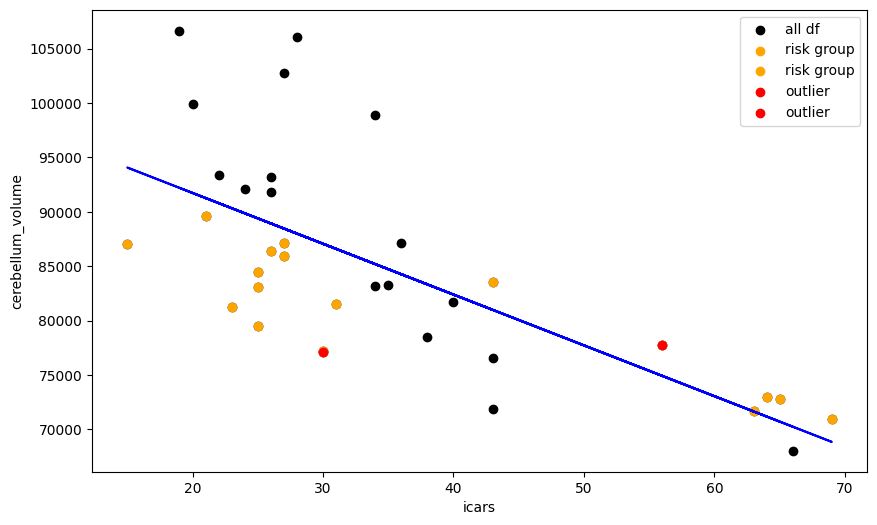

In [140]:
data_set = []
for i in range(10):
  data_set.append(df)
  threshold = makeModel(df)
  initModel(df, original_line[i])
  sa, ba, sa_icars_mean, ba_icars_mean = seperateData(df, threshold)
  above_outlier, below_outlier = makeOutlier(sa, ba, sa_icars_mean, ba_icars_mean, df)
  drawOutlierModel(above_outlier, below_outlier, original_line[i], df)
  df = deleteOutlier(df, above_outlier, below_outlier)
  # print(sa[sa['icars'] > sa_icars_mean],'\n', ba[ba['icars'] < ba_icars_mean],'\n', above_outlier, '\n', below_outlier)

In [141]:
original_coef

[array([-161.70919587]),
 array([-189.50845092]),
 array([-219.99596449]),
 array([-259.17677303]),
 array([-305.15313263]),
 array([-316.37455763]),
 array([-353.32289751]),
 array([-428.27660853]),
 array([-454.79618122]),
 array([-467.08111963])]

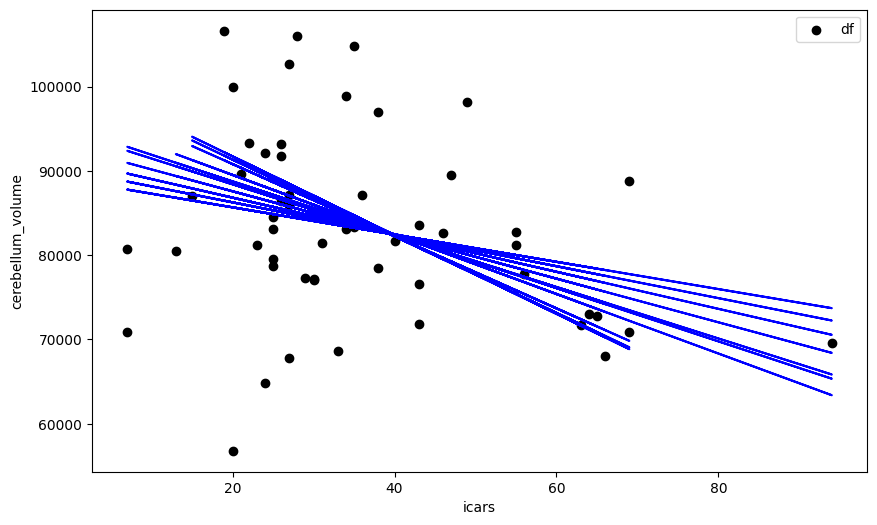

In [143]:
plt.figure(figsize=(10, 6))

# 예측된 값이 임계값 이상인 경우 파랑색으로 표시
plt.scatter(data['icars'], data['cerebellum_volume'], color='black', label='df')

# 선형 회귀 예측 결과 그리기 (초록색)
for i in range(len(original_line)):
  plt.plot(data_set[i]['icars'], original_line[i] , linestyle='-', color='blue')

# 그래프에 축 레이블 추가
plt.xlabel('icars')
plt.ylabel('cerebellum_volume')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()

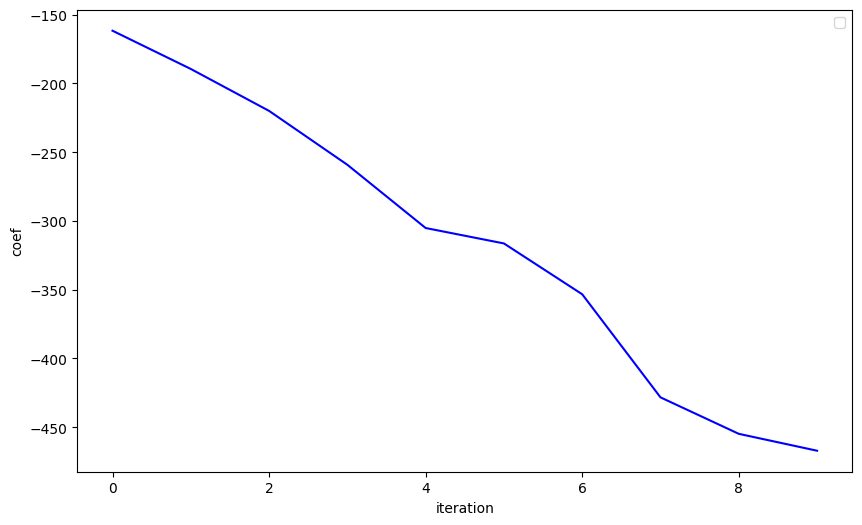

In [147]:
plt.figure(figsize=(10, 6))

# 선형 회귀 예측 결과 그리기 (초록색)
plt.plot(range(10), original_coef, linestyle='-', color='blue')

# 그래프에 축 레이블 추가
plt.xlabel('iteration')
plt.ylabel('coef')

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()